Populating the interactive namespace from numpy and matplotlib


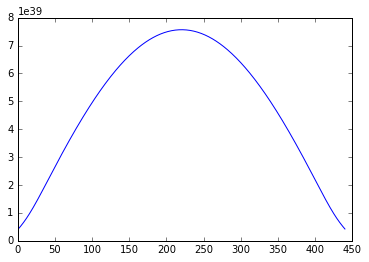

In [16]:
import math
import numpy
import pyaudio
import numpy.fft as fft
from numpy.random import rand
from matplotlib import pylab
#from numba import jit
%pylab inline

#@jit
def signal(time, rate, freq):
    n = int(time*freq)
    h = numpy.array([math.sqrt(0.18), .8, math.sqrt(0.18)])/sqrt(2)
    #length = int(time * rate)
    sample = int(rate/freq)
    sig = numpy.sin(numpy.arange(0,sample)*math.pi/sample) #rand(sample)-0.5
    signal = numpy.zeros(n * sample)
    #signal = sig
    signal[0:sample] = sig
    #sig_n = sig
    for i in range(1,n):
        for j in range(sample):
            signal[sample* i + j] = h[0]*signal[(i-1) * sample + (j-1)] + h[1]*signal[(i-1)*sample+j] + h[2]*signal[(i-1)*sample + (j+1)%sample]
        #sig = sig_n
        #signal = numpy.concatenate((signal,sig), axis =0)
    plot(signal[-sample:])
    return signal
    
def play_tone(stream, time=6, rate=44100, freq=100):
    playback = signal(time, rate, freq) * 0.15

    stream.write(playback.astype(numpy.float32).tostring())


if __name__ == '__main__':
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paFloat32,
                    channels=1, rate=44100, output=1)

    play_tone(stream)

    stream.close()
    p.terminate()

In [ ]:
def signal(time, rate, freq):
    n = int(time*freq)
    h = numpy.array([.2, .6, .2])
    #length = int(time * rate)
    sample = int(rate/freq)
    sig = rand(sample)-0.5
    signal = numpy.zeros(n * sample)
    #signal = sig
    signal[0:sample] = sig
    #sig_n = sig
    for i in range(1,n):
        #for j in range(sample):
        signal[sample*i:sample*(i+1)] = h[0]*signal[(i-1)*sample:i*sample-1]
            signal[sample* i + j] = h[0]*signal[(i-1) * sample + (j-1)] + h[1]*signal[(i-1)*sample+j] + h[2]*signal[(i-1)*sample + (j+1)%sample]
        #sig = sig_n
        #signal = numpy.concatenate((signal,sig), axis =0)
    plot(signal[-sample:])
    return signal

In [7]:
a=rand(5)